
# Jupyter Notebook port of YOLO v3 running Windows
Luc Chouinard
sources forked from:
### Original version:
    https://pjreddie.com/darknet/yolo/
    https://github.com/pjreddie/darknet/tree/master/data
"@article{yolov3,
  title={YOLOv3: An Incremental Improvement},
  author={Redmon, Joseph and Farhadi, Ali},
  journal = {arXiv},
  year={2018}
}
"
### Windows version adaptation:
    https://itnext.io/implementing-yolo-v3-in-tensorflow-tf-slim-c3c55ff59dbe
    https://github.com/mystic123/tensorflow-yolo-v3


In [1]:
import glob
from IPython.display import Image, display
#for imageNamein glob.glob('../tensorflow-yolo-v3-master/data/*.JPG'):


In [2]:
print(glob.glob('*.*'))

['coco.names.lnk', 'coco.names.txt', 'convert_weights.py', 'demo.py', 'README.md', 'utils.py', 'yolov3.weights', 'yolov3LC.ipynb', 'yolov3LC_orig.ipynb', 'yolo_v3.py', 'yolo_v3_tiny.py']


In [3]:
print(glob.glob('../*'))

['..\\notebook', '..\\notebook-displayNets', '..\\notebook_yolov3_webcam', '..\\SAF_tensorflow-yolo-v3-master', '..\\tensorflow-yolo-v3-master']


In [4]:
#print(glob.glob('..\\tensorflow-yolo-v3-master/data/*'))

In [5]:
for imageName in glob.glob('..\\tensorflow-yolo-v3-master/data\\kiteLucAncComp07.jpg'):
    #Large Display of picture
    #display(Image(filename=imageName))
    print(imageName)

..\tensorflow-yolo-v3-master/data\kiteLucAncComp07.jpg


In [6]:
import scipy.misc
from matplotlib.pyplot import imshow

#content_image = scipy.misc.imread("images/louvre.jpg")
content_image = scipy.misc.imread("../tensorflow-yolo-v3-master/data/kiteLucAncComp07.jpg")
content_image = scipy.misc.imread("../tensorflow-yolo-v3-master/data/traffic.jpg")
#content_image = scipy.misc.imageio.imread("../tensorflow-yolo-v3-master/data/kiteLucAncComp07.jpg")
imshow(content_image)

D:\tools\Anaconda\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
D:\tools\Anaconda\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [7]:
import imageio
dirname = '..\\tensorflow-yolo-v3-master\\data\\'
filename = 'kiteLucAncComp07.jpg'
filename = 'traffic.jpg'
fn_prefix,fn_suffix=filename.split(".")
print("==============================================")
print("dirname   : " + dirname  )
print("filename  : " + filename )
print("fn_prefix : " + fn_prefix)
print("fn_suffix : " + fn_suffix)
print("==============================================")

print("1->" + dirname + filename)
print(glob.glob(dirname + filename))
#im = imageio.imread(dirname +  'kiteLucAncComp07.jpg')
im = imageio.imread(dirname +  filename)
print(im.shape)

dirname   : ..\tensorflow-yolo-v3-master\data\
filename  : traffic.jpg
fn_prefix : traffic
fn_suffix : jpg
1->..\tensorflow-yolo-v3-master\data\traffic.jpg
['..\\tensorflow-yolo-v3-master\\data\\traffic.jpg']
(480, 704, 3)


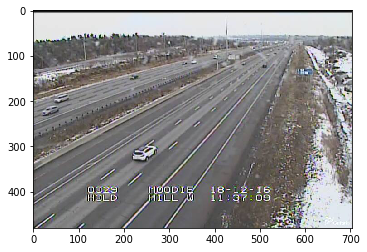

In [8]:
imshow(im)

***
# demo.py
<div class="alert alert-block alert-info">
<b>Tip:</b> The code below is taken from demo.py
---
***
https://github.com/mystic123/tensorflow-yolo-v3
***
</div>


In [9]:
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw

import yolo_v3
import yolo_v3_tiny

from utils import load_coco_names, draw_boxes, convert_to_original_size, \
    load_weights, detections_boxes, non_max_suppression

In [10]:
FLAGS = tf.app.flags.FLAGS

#tf.app.flags.DEFINE_string('input_img', '', 'Input image')
#tf.app.flags.DEFINE_string('output_img', '', 'Output image')
tf.app.flags.DEFINE_string('input_img', dirname + filename , 'Input image')
tf.app.flags.DEFINE_string('output_img', dirname + fn_prefix + "OUT1." + fn_suffix, 'Output image')

tf.app.flags.DEFINE_string(
    'class_names', 'coco.names.txt', 'File with class names')
#    'class_names', 'coco.names', 'File with class names')
tf.app.flags.DEFINE_string(
    'weights_file', 'yolov3.weights', 'Binary file with detector weights')
tf.app.flags.DEFINE_string(
    'data_format', 'NCHW', 'Data format: NCHW (gpu only) / NHWC')
tf.app.flags.DEFINE_string(
    'ckpt_file', './saved_model/model.ckpt', 'Checkpoint file')
tf.app.flags.DEFINE_bool(
    'tiny', False, 'Use tiny version of YOLOv3')

tf.app.flags.DEFINE_integer('size', 416, 'Image size')

tf.app.flags.DEFINE_float('conf_threshold', 0.5, 'Confidence threshold')
tf.app.flags.DEFINE_float('iou_threshold', 0.4, 'IoU threshold')



https://stackoverflow.com/questions/46742441/introductory-mnist-example-from-tensorflow-results-in-exception
#FLAGS.data_dir

In [11]:
#type(FLAGS)
#print(FLAGS)
#tf.app.flags.DEFINE_string('dir_name', dirname, 'Directory Name')
#tf.app.flags.DEFINE_string('data_format', "NCHW", 'Data Format')
#from sys
#remaining_args = FLAGS([sys.argv[0]] + [flag for flag in sys.argv if flag.startswith("--")])
#assert(remaining_args == [sys.argv[0]])
from sys import argv as sys_argv
remaining_args = FLAGS([sys_argv[0]] + [flag for flag in sys_argv if flag.startswith("--")])
assert(remaining_args == [sys_argv[0]])

# demo.py, def main

In [12]:
#def main(argv=None):
def main(argv=FLAGS):
    if FLAGS.tiny:
        model = yolo_v3_tiny.yolo_v3_tiny
    else:
        model = yolo_v3.yolo_v3

    #LC print
    #print(FLAGS)
    #print("FLAGS.input_img: " + FLAGS.input_img + "\n")
    #img = Image.open(FLAGS.input_img)
    img = Image.open(dirname +  filename)
    img_resized = img.resize(size=(FLAGS.size, FLAGS.size))

    classes = load_coco_names(FLAGS.class_names)

    # placeholder for detector inputs
    inputs = tf.placeholder(tf.float32, [1, FLAGS.size, FLAGS.size, 3])

    with tf.variable_scope('detector'):
        detections = model(inputs, len(classes),
                           data_format=FLAGS.data_format)

    saver = tf.train.Saver(var_list=tf.global_variables(scope='detector'))

    boxes = detections_boxes(detections)

    with tf.Session() as sess:
        saver.restore(sess, FLAGS.ckpt_file)
        print('Model restored.')

        detected_boxes = sess.run(
            boxes, feed_dict={inputs: [np.array(img_resized, dtype=np.float32)]})

    filtered_boxes = non_max_suppression(detected_boxes,
                                         confidence_threshold=FLAGS.conf_threshold,
                                         iou_threshold=FLAGS.iou_threshold)

    draw_boxes(filtered_boxes, img, classes, (FLAGS.size, FLAGS.size))

    #img.save(FLAGS.output_img)
    img.save(dirname +  fn_prefix + "OUT1" + "." + fn_suffix)

if __name__ == '__main__':
    #tf.app.run()
    #tf.Session.run(main,None)

    main()

INFO:tensorflow:Restoring parameters from ./saved_model/model.ckpt
Model restored.


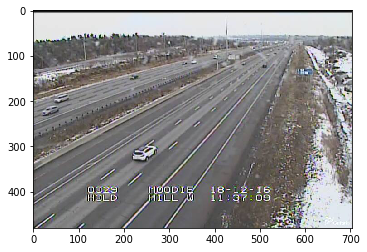

In [14]:
imshow(im)

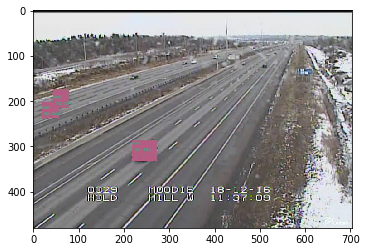

In [13]:
im_out = imageio.imread(dirname +  fn_prefix + "OUT1" + "." + fn_suffix)
imshow(im_out)